In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [3]:
data=pd.read_csv("loan.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data.shape

(614, 13)

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

###### Checking missing values

In [11]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

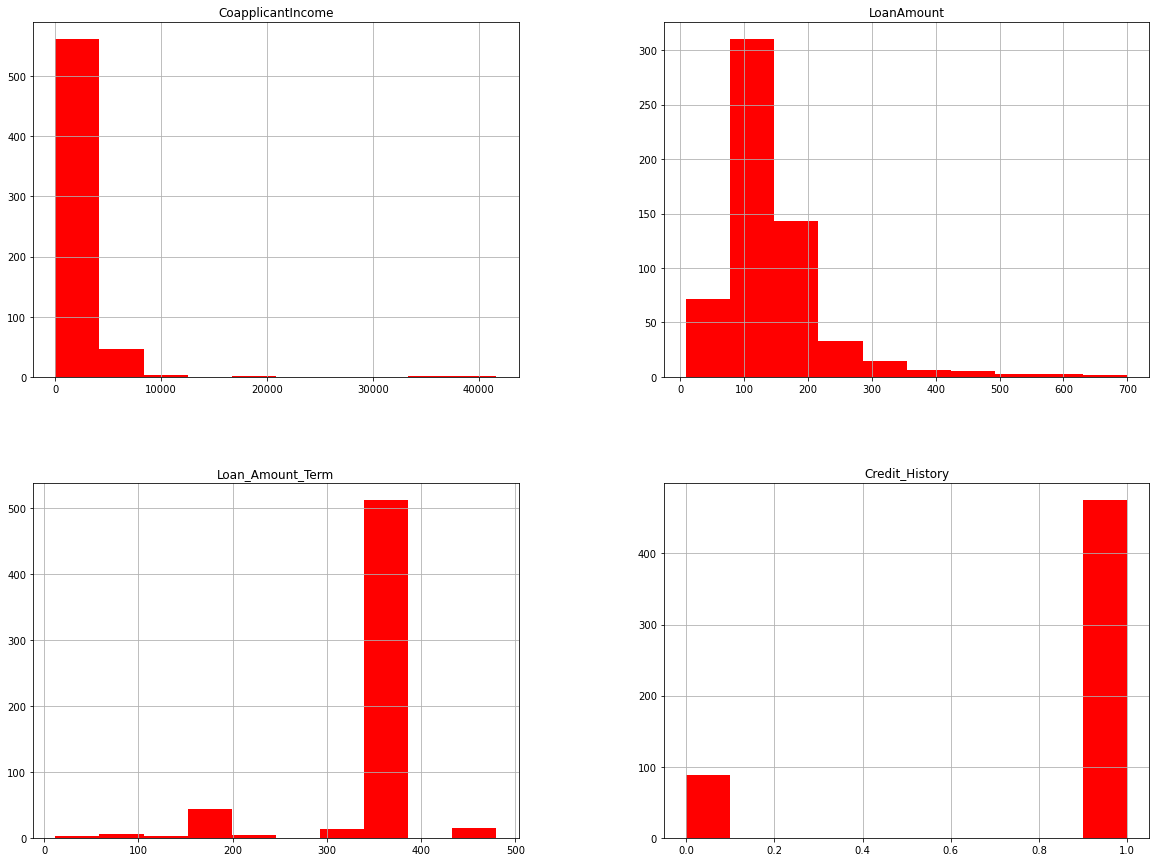

In [12]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15),color='red')
plt.show()

In [13]:
for i in ['Loan_Amount_Term', 'Credit_History']:
    
    data[i]=data[i].fillna(data[i].mean())


In [14]:
 data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].median())

In [15]:
for j in ['Gender','Married','Dependents','Self_Employed']:
    print(j)
    print(data[j].value_counts())

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


In [16]:
#filling categorical values with mode

In [17]:
for j in ['Gender','Married','Dependents','Self_Employed']:
    data[j]=data[j].fillna(data[j].mode()[0])

In [18]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
#missing values are filled

In [20]:
#outlier detection
#ploting Boxplot to detect outliers

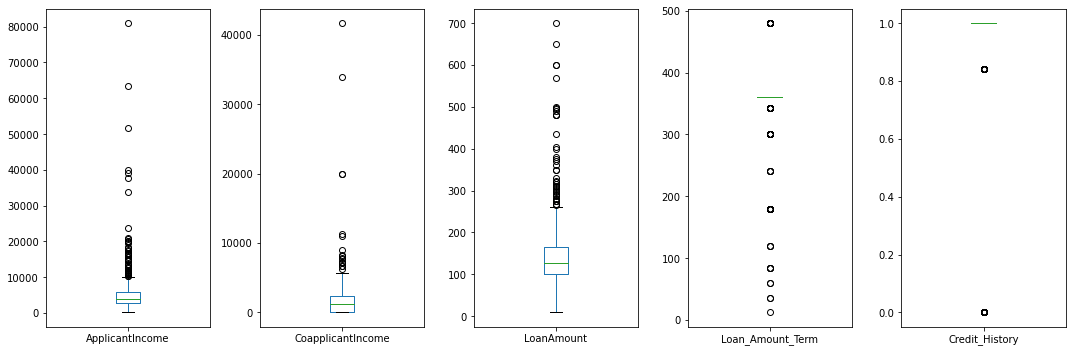

In [21]:
data.plot(kind= "box",figsize=(15,5),subplots=True)
plt.tight_layout()
plt.show()

In [22]:
data.shape

(614, 13)

In [23]:
#label Encoding to the categorical values

In [24]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
col =[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area']

In [26]:
for i in col:
    print(i)
    print(data[i].value_counts())

Gender
Male      502
Female    112
Name: Gender, dtype: int64
Married
Yes    401
No     213
Name: Married, dtype: int64
Dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     532
Yes     82
Name: Self_Employed, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder
for i in col :
    le=LabelEncoder()
    data[i]=le.fit_transform(data[i])

In [28]:
#scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]=sd.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])

In [30]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,614.000000,614.000000,614.000000,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,-2.694189e-17,-3.977998e-18,-7.910791e-18,342.000000,0.842199,1.037459
std,0.386497,0.476373,1.009623,0.413389,0.340446,1.000815e+00,1.000815e+00,1.000815e+00,64.372489,0.349681,0.787482
min,0.000000,0.000000,0.000000,0.000000,0.000000,-8.606493e-01,-5.544873e-01,-1.627255e+00,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-4.138159e-01,-5.544873e-01,-5.414462e-01,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,-2.606393e-01,-1.480047e-01,-2.112412e-01,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,6.414426e-02,2.312023e-01,2.260572e-01,360.000000,1.000000,2.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.238462e+01,1.369617e+01,6.595146e+00,480.000000,1.000000,2.000000


<AxesSubplot:>

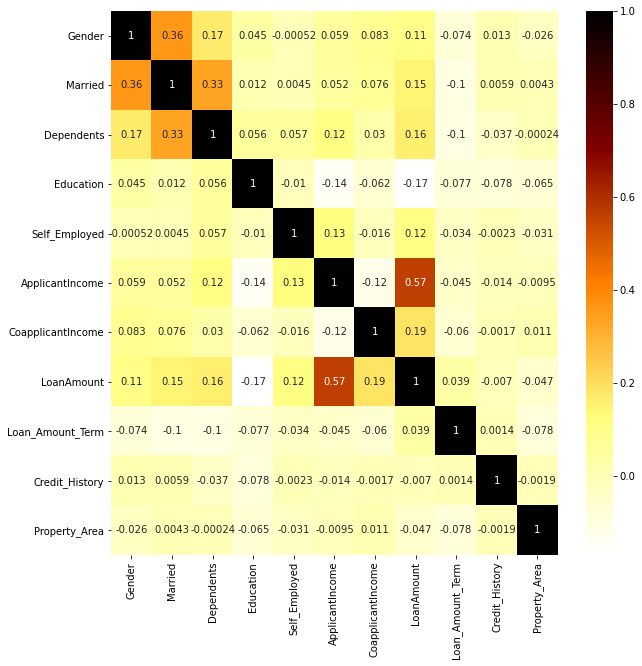

In [31]:
cor=data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(cor ,annot=True,linecolor='white',cmap='afmhot_r')

In [32]:
data.Loan_Amount_Term.nunique()

11

In [33]:
#model Buliding

In [34]:
#Data Splitting 
X=data.drop(['Loan_ID','Loan_Status','Loan_Amount_Term','Credit_History'],axis=1)
y=data['Loan_Status']

In [35]:
X.shape

(614, 9)

In [36]:
y.shape

(614,)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=30,test_size=0.5)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred=lg.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           N       0.33      0.03      0.06        98
           Y       0.68      0.97      0.80       209

    accuracy                           0.67       307
   macro avg       0.51      0.50      0.43       307
weighted avg       0.57      0.67      0.56       307



In [40]:
confusion_matrix(y_test,y_pred)

array([[  3,  95],
       [  6, 203]], dtype=int64)

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1,random_state=20,max_depth=100)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           N       0.35      0.41      0.38        98
           Y       0.70      0.65      0.67       209

    accuracy                           0.57       307
   macro avg       0.53      0.53      0.52       307
weighted avg       0.59      0.57      0.58       307



In [42]:
confusion_matrix(y_test,y_pred)

array([[ 40,  58],
       [ 74, 135]], dtype=int64)

# Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred,zero_division='warn'))

              precision    recall  f1-score   support

           N       0.30      0.32      0.31        98
           Y       0.67      0.66      0.67       209

    accuracy                           0.55       307
   macro avg       0.49      0.49      0.49       307
weighted avg       0.56      0.55      0.55       307



In [44]:
confusion_matrix(y_test,y_pred)

array([[ 31,  67],
       [ 71, 138]], dtype=int64)

In [45]:
print("accuracy :", accuracy_score(y_test,y_pred))

accuracy : 0.5504885993485342


# Knn

In [46]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(10,20)
for k in neighbors:
    kn=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    kn.fit(X_train,y_train)
    y_pred=kn.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [47]:
acc_values

[0.6644951140065146,
 0.6742671009771987,
 0.6644951140065146,
 0.6840390879478827,
 0.6840390879478827,
 0.6775244299674267,
 0.6677524429967426,
 0.6807817589576547,
 0.6677524429967426,
 0.6775244299674267]

Text(0, 0.5, 'accuracy')

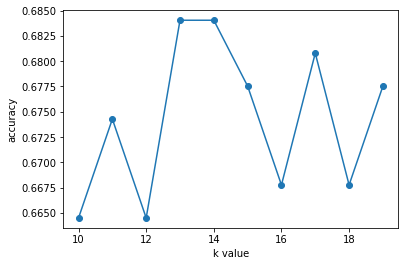

In [48]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel("k value")
plt.ylabel("accuracy")

In [49]:
kn=KNeighborsClassifier(n_neighbors=14,metric='minkowski')
kn.fit(X_train,y_train)
y_pred=kn.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=1))  

              precision    recall  f1-score   support

           N       0.54      0.07      0.13        98
           Y       0.69      0.97      0.81       209

    accuracy                           0.68       307
   macro avg       0.61      0.52      0.47       307
weighted avg       0.64      0.68      0.59       307



In [50]:
confusion_matrix(y_test,y_pred)

array([[  7,  91],
       [  6, 203]], dtype=int64)

# SVM

In [51]:
from sklearn.svm import SVC
sm = SVC(kernel="poly",degree=10,gamma=20)
sm.fit(X_train, y_train)
y_pred = sm.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=1))  

              precision    recall  f1-score   support

           N       0.38      0.38      0.38        98
           Y       0.71      0.71      0.71       209

    accuracy                           0.60       307
   macro avg       0.54      0.54      0.54       307
weighted avg       0.60      0.60      0.60       307



In [52]:
confusion_matrix(y_test,y_pred)

array([[ 37,  61],
       [ 61, 148]], dtype=int64)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [54]:
lr_list = [ 0.01,0.001, 0.5, 0.75,1,10]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=60, learning_rate=learning_rate, max_features=7, max_depth=10, random_state=2)
    gb_clf.fit(X_train, y_train)
  
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Learning rate:  0.01
Accuracy score (training): 0.886
Accuracy score (validation): 0.664
Learning rate:  0.001
Accuracy score (training): 0.694
Accuracy score (validation): 0.681
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.609
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.603
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.616
Learning rate:  10
Accuracy score (training): 0.997
Accuracy score (validation): 0.593


In [55]:
gb=GradientBoostingClassifier(n_estimators=60, learning_rate=0.01, max_features=8, max_depth=10,random_state=2)
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.36      0.12      0.18        98
           Y       0.69      0.90      0.78       209

    accuracy                           0.65       307
   macro avg       0.52      0.51      0.48       307
weighted avg       0.58      0.65      0.59       307



In [56]:
confusion_matrix(y_pred,y_test)

array([[ 12,  21],
       [ 86, 188]], dtype=int64)